In [2]:
import pandas as pd
import numpy as  np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df=pd.read_excel('TuHocCuaSinhVien.xlsx')
print(df.head())

In [19]:
lb_make = LabelEncoder()
preference_mapping = {'Yên Tĩnh': 0, 'Có Thể Yên Tĩnh': 1, 'Có Thể Ồn Ào': 2}
Location_mapping={'Ở Nhà':0,'Thư viện':1 , 'nhà sách':2, 'Trường học':3, 'Quán nước':4, 'Tất cả mọi nơi':5 }
PreferenceOfWeather_mapping={'Nắng':0, 'Mưa':1, 'Mưa nhẹ':2, 'Có mây':3, 'Mát mẻ':4}
Purpose_mapping={'Để đạt điểm cao':0,'Biết thêm nhiều kiến thức':1,'Để có được công việc':2,'Rèn luyện thói quen học tập của mình':3}
AcademicChallengesFaced_mapping={'Chương trình học quá nặng':0,'Thời gian học trên lớp quá nhiều':1,'Quá nhiều bài tập về nhà':2,'Không biết học phương pháp nào cho hiệu quả':3, 'khả năng tiếp thu kém':4,'Khả năng tiếp thu kém':4,'Khó khăn khi tìm tài liệu':5,'Tất cả các ý trên':6}

df['PreferenceOfEnvironment'] = df['PreferenceOfEnvironment'].apply(lambda x: ', '.join([str(preference_mapping[pref.strip()]) for pref in x.split(',')]))
df['Location'] = df['Location'].apply(lambda x: ', '.join([str(Location_mapping[pref.strip()]) for pref in x.split(',')]))
df['PreferenceOfWeather'] = df['PreferenceOfWeather'].apply(lambda x: ', '.join([str(PreferenceOfWeather_mapping[pref.strip()]) for pref in x.split(',')]))
df['Purpose'] = df['Purpose'].apply(lambda x: ', '.join([str(Purpose_mapping[pref.strip()]) for pref in x.split(',')]))
df['AcademicChallengesFaced'] = df['AcademicChallengesFaced'].apply(lambda x: ', '.join([str(AcademicChallengesFaced_mapping[pref.strip()]) for pref in x.split(',')]))
# Thay thế các giá trị bằng các số tương ứng
dftest=df
dftest.replace({
    'Thường xuyên': 1,
    'Thỉnh thoảng': 0.5,
    'Không có': 0,
    'Phân vân': 0.4,
    'Không đồng ý': 0.2,
    'Đồng ý': 0.6,
    'Hoàn toàn đồng ý': 1,
    'Rất không đồng ý': 0,
    'Không': 0,
    'Có': 1,
    'Ít': 0.5,
    'Nhiều': 1,
    'Nam':0,
    'Nữ':1,
    
}, inplace=True)

# Tạo bản sao của dataframe
df_transformed = df.copy()

# Tạo đối tượng LabelEncoder
lb_make = LabelEncoder()

# Duyệt qua từng cột và áp dụng LabelEncoder, ngoại trừ cột GPA
for column in df_transformed.columns:
        df_transformed[column] = df_transformed[column].astype(str)  # Chuyển cột về kiểu chuỗi
        df_transformed[column] = lb_make.fit_transform(df_transformed[column])

# Giữ nguyên cột GPA từ dataframe gốc
df_transformed['GPA'] = df['GPA']

# Hiển thị dataframe đã biến đổi
df_transformed
df4 = df_transformed.drop(columns=['Purpose', 'PreferenceOfWeather','Location','AcademicChallengesFaced','PreferenceOfEnvironment','Platform','Major','Year'])



C:\Users\TUAN\AppData\Local\Temp\ipykernel_28332\3040285388.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dftest.replace({


Accuracy: 0.75833
Confusion Matrix:
[[  2  55]
 [  3 180]]
Classification Report:
              precision    recall  f1-score   support

         Cao       0.40      0.04      0.06        57
        Thấp       0.77      0.98      0.86       183

    accuracy                           0.76       240
   macro avg       0.58      0.51      0.46       240
weighted avg       0.68      0.76      0.67       240



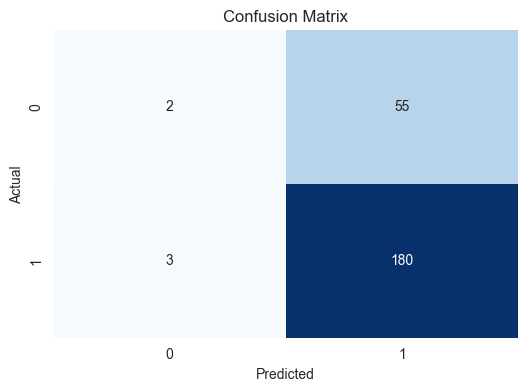

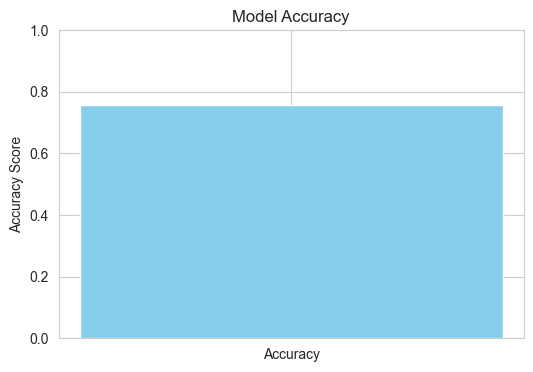

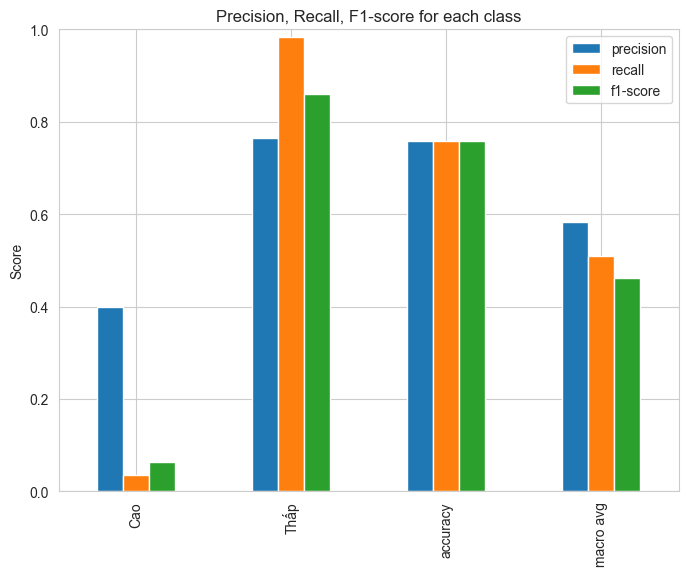

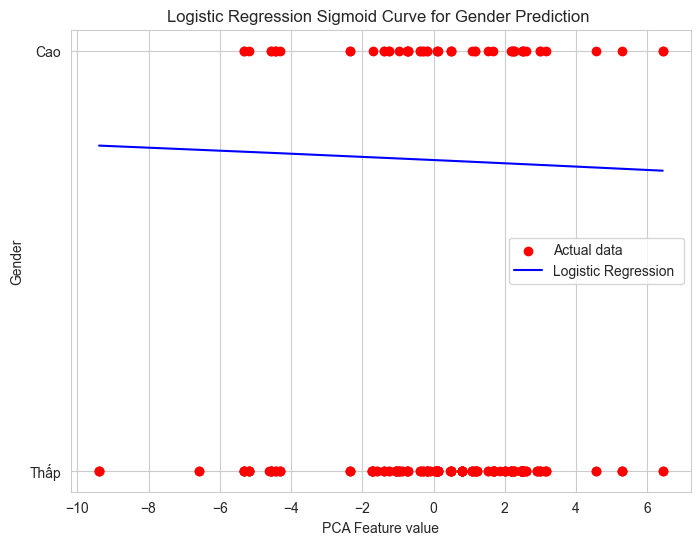

In [20]:

# Giả định bạn đã có một DataFrame df_transformed chứa cột 'GPA'
def classify_gpa(gpa):
    if gpa >= 3:
        return 'Cao'
    else :
        return 'Thấp'

# Chuyển đổi dữ liệu và thêm cột GPA đã phân loại
df = pd.DataFrame(df4)
df['GPA'] = df['GPA'].apply(classify_gpa)

# Xóa cột 'GPA' khỏi X và lấy Y
X = df.drop(columns=['GPA'])
y = df['GPA']

# Bước 2: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bước 3: Khởi tạo và huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=2000, solver='lbfgs')  # Không cần chỉ định multi_class
model.fit(X_train, y_train)

# Bước 4: Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Bước 5: Đánh giá độ chính xác
accuracy_llr = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)  # Thêm zero_division để xử lý nhãn không có

# In kết quả đánh giá
print(f'Accuracy: {accuracy_llr:.5f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Vẽ ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy = accuracy_score(y_test, y_pred)

# Vẽ biểu đồ cột cho độ chính xác
plt.figure(figsize=(6,4))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy Score')
plt.show()


# Chuyển classification report thành dạng dataframe để dễ vẽ
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Vẽ biểu đồ thanh cho Precision, Recall và F1-score
df_report[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(8,6))
plt.title('Precision, Recall, F1-score for each class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


# Chọn cột đầu tiên hoặc cột bạn muốn từ X
X_train_one_feature = X_train.iloc[:, 0].values.reshape(-1, 1)
X_test_one_feature = X_test.iloc[:, 0].values.reshape(-1, 1)

# Khởi tạo lại mô hình Logistic Regression với một đặc trưng
model_one_feature = LogisticRegression(max_iter=2000, solver='lbfgs')

# Huấn luyện mô hình chỉ với một đặc trưng
model_one_feature.fit(X_train_one_feature, y_train)

# Sắp xếp X_test để vẽ sigmoid
sorted_indices = np.argsort(X_test_one_feature, axis=0).ravel()
X_test_sorted = X_test_one_feature[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]

# Dự đoán xác suất
y_prob = model_one_feature.predict_proba(X_test_sorted)[:, 1]

from sklearn.decomposition import PCA

# Áp dụng PCA để giảm chiều xuống còn 1
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Huấn luyện mô hình Logistic Regression trên dữ liệu PCA
model_pca = LogisticRegression(max_iter=2000, solver='lbfgs')
model_pca.fit(X_train_pca, y_train)

# Sắp xếp X_test sau PCA để vẽ sigmoid
sorted_indices = np.argsort(X_test_pca, axis=0).ravel()
X_test_sorted = X_test_pca[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]

# Dự đoán xác suất với mô hình sau PCA
y_prob = model_pca.predict_proba(X_test_sorted)[:, 1]

# Vẽ đồ thị sigmoid
plt.figure(figsize=(8, 6))
plt.scatter(X_test_sorted, y_test_sorted, color='red', label='Actual data')
plt.plot(X_test_sorted, y_prob, color='blue', label='Logistic Regression ')
plt.xlabel('PCA Feature value')
plt.ylabel('Gender')
plt.title('Logistic Regression Sigmoid Curve for Gender Prediction ')
plt.legend()
plt.show()



Linear Regression Mean Squared Error: 1.4140411179157744

Comparison of Actual and Predicted Values:
        Actual  Predicted  Absolute Error  Percentage Error
1178  3.066566   2.156250        0.910316         29.685181
865   3.116693   2.000000        1.116693         35.829416
101   3.084143   1.906250        1.177893         38.191900
439   0.394152   1.906250        1.512098        383.633501
58    0.056321   1.500000        1.443679       2563.326496
...        ...        ...             ...               ...
382   3.974212   2.500000        1.474212         37.094441
867   3.623286   1.656250        1.967036         54.288726
542   2.233186   1.742188        0.490999         21.986473
1193  1.953693   2.257812        0.304119         15.566372
874   1.753536   2.203125        0.449589         25.638989

[240 rows x 4 columns]

Accuracy: 0.76250
Confusion Matrix:
[[  0  57]
 [  0 183]]
Classification Report:
              precision    recall  f1-score   support

         Cao     

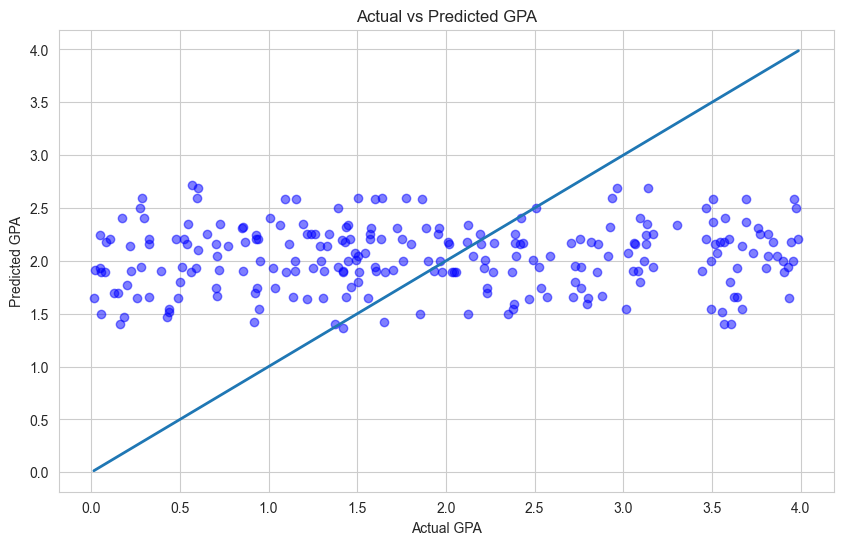

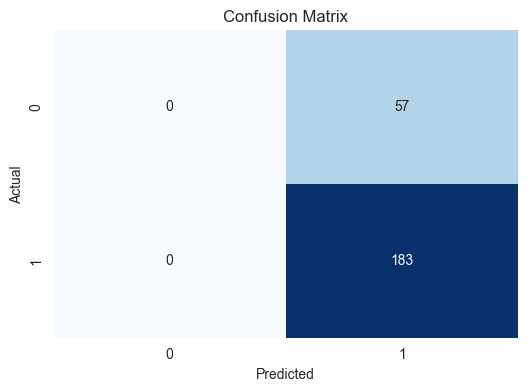

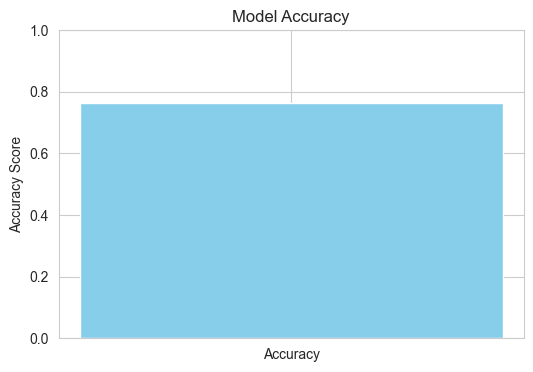

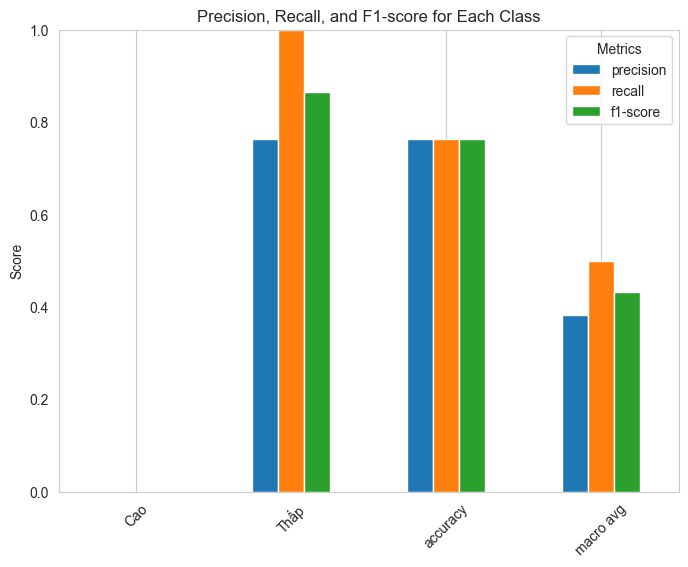

In [21]:
from sklearn.metrics import mean_squared_error
# Giả định bạn đã có một DataFrame df_transformed chứa cột 'GPA'
df = pd.DataFrame(df4)


X=df.drop(columns=['GPA'])
y = df["GPA"]  # Target variable

# Convert categorical variables to numerical
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_linear = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)

# Creating a DataFrame to compare actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})
results_df['Absolute Error'] = np.abs(results_df['Actual'] - results_df['Predicted'])
results_df['Percentage Error'] = (results_df['Absolute Error'] / results_df['Actual']) * 100

# Phân loại dự đoán thành các lớp
def classify_gpa(gpa):
    if gpa >= 3:
        return 'Cao'
    else :
        return 'Thấp'

# Chuyển đổi giá trị dự đoán thành các lớp
y_pred_classes = np.array([classify_gpa(gpa) for gpa in y_pred_linear])
y_test_classes = np.array([classify_gpa(gpa) for gpa in y_test])

# Tính toán các chỉ số phân loại
accuracy = accuracy_score(y_test_classes, y_pred_classes)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
class_report = classification_report(y_test_classes, y_pred_classes, zero_division=0)

# Kết quả đánh giá
print(f"Linear Regression Mean Squared Error: {linear_mse}")
print("\nComparison of Actual and Predicted Values:")
print(results_df)
print(f"\nAccuracy: {accuracy:.5f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Step 4: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2)  # Diagonal line
plt.title('Actual vs Predicted GPA')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.grid(True)
plt.show()


# Vẽ ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy_lr = accuracy_score(y_test_classes, y_pred_classes)

# Vẽ biểu đồ cột cho độ chính xác
plt.figure(figsize=(6,4))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy Score')
plt.show()


# Giả định y_test_classes và y_pred_classes đã được định nghĩa từ trước
report = classification_report(y_test_classes, y_pred_classes, output_dict=True, zero_division=0)
# Chuyển đổi báo cáo thành DataFrame
df_report = pd.DataFrame(report).transpose()

# Vẽ biểu đồ thanh cho Precision, Recall và F1-score
df_report[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(8, 6))
plt.title('Precision, Recall, and F1-score for Each Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc
plt.grid(axis='y')  # Thêm lưới cho trục y để dễ theo dõi
plt.legend(title='Metrics')
plt.show()



Accuracy (Decision Tree): 0.75417
Confusion Matrix (Decision Tree):
[[  3  54]
 [  5 178]]
Classification Report (Decision Tree):
              precision    recall  f1-score   support

         Cao       0.38      0.05      0.09        57
        Thấp       0.77      0.97      0.86       183

    accuracy                           0.75       240
   macro avg       0.57      0.51      0.48       240
weighted avg       0.67      0.75      0.68       240



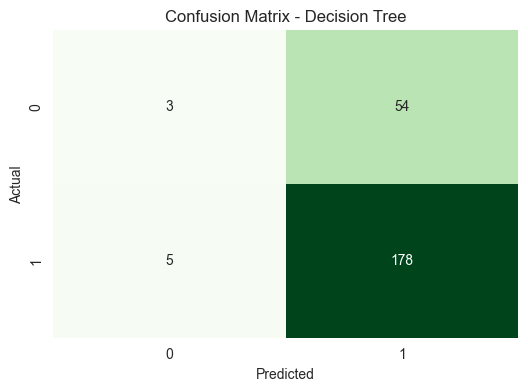

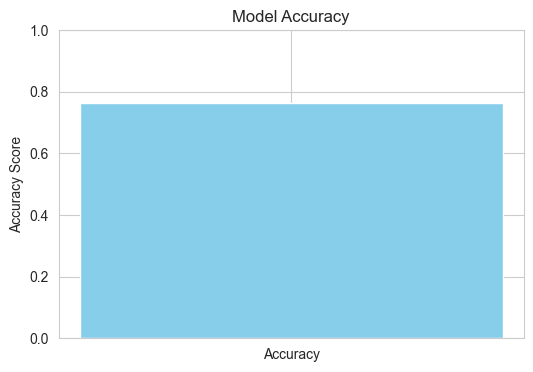

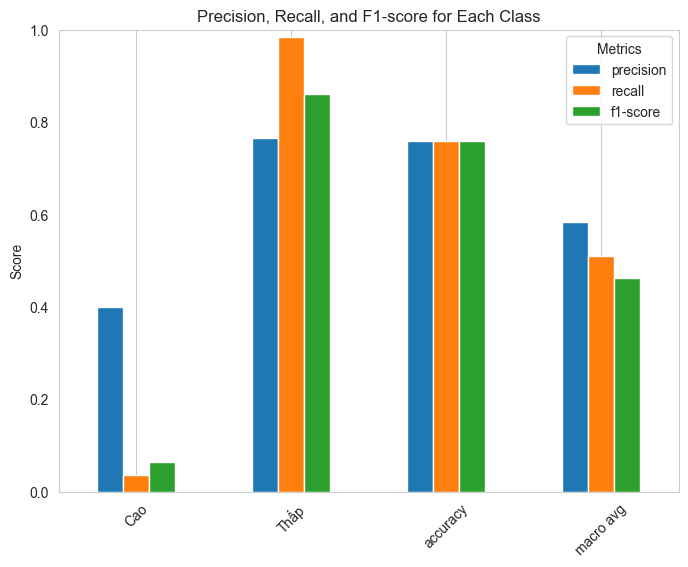

In [27]:
from sklearn.tree import DecisionTreeClassifier
# Giả định bạn đã có một DataFrame df_transformed chứa cột 'GPA'
def classify_gpa(gpa):
    if gpa >= 3:
        return 'Cao'
    else :
        return 'Thấp'

# Chuyển đổi dữ liệu và thêm cột GPA đã phân loại
df = pd.DataFrame(df4)
df['GPA'] = df['GPA'].apply(classify_gpa)

# Xóa cột 'GPA' khỏi X và lấy Y
X = df.drop(columns=['GPA'])
y = df['GPA']
# Bước 2: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Khởi tạo và huấn luyện Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_tree = tree_model.predict(X_test)

# Đánh giá độ chính xác
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree, zero_division=0)

# In kết quả đánh giá
print(f'Accuracy (Decision Tree): {accuracy_tree:.5f}')
print('Confusion Matrix (Decision Tree):')
print(conf_matrix_tree)
print('Classification Report (Decision Tree):')
print(class_report_tree)

# Vẽ ma trận nhầm lẫn cho Decision Tree
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Vẽ biểu đồ cột cho độ chính xác
plt.figure(figsize=(6,4))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy Score')
plt.show()


# Giả định y_test_classes và y_pred_classes đã được định nghĩa từ trước
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
# Chuyển đổi báo cáo thành DataFrame
df_report = pd.DataFrame(report).transpose()

# Vẽ biểu đồ thanh cho Precision, Recall và F1-score
df_report[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(8, 6))
plt.title('Precision, Recall, and F1-score for Each Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc
plt.grid(axis='y')  # Thêm lưới cho trục y để dễ theo dõi
plt.legend(title='Metrics')
plt.show()

Accuracy (Naive Bayes): 0.62917
Confusion Matrix (Naive Bayes):
[[ 16  41]
 [ 48 135]]
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

         Cao       0.25      0.28      0.26        57
        Thấp       0.77      0.74      0.75       183

    accuracy                           0.63       240
   macro avg       0.51      0.51      0.51       240
weighted avg       0.64      0.63      0.64       240



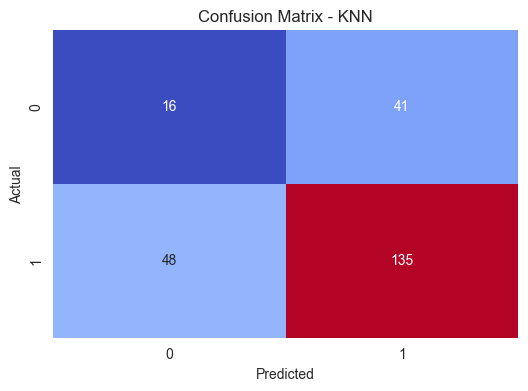

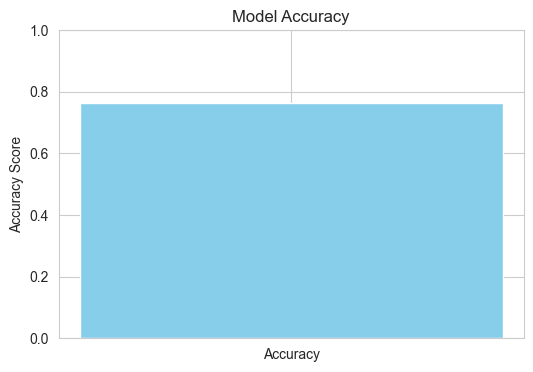

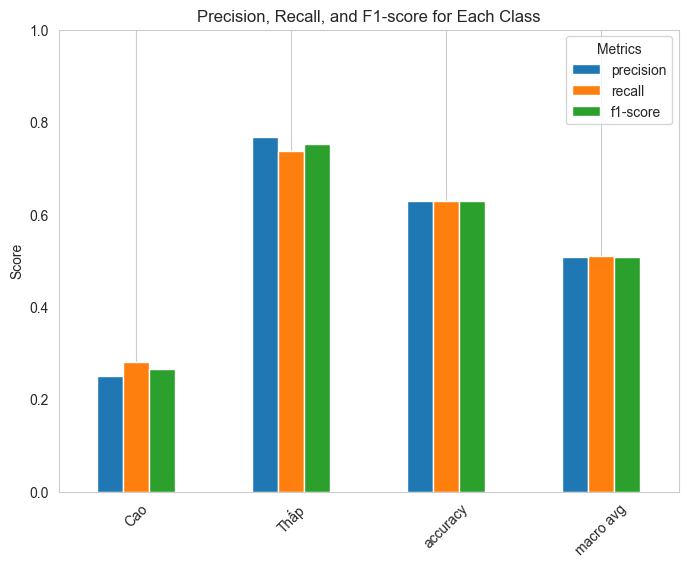

In [26]:
from sklearn.naive_bayes import GaussianNB

def classify_gpa(gpa):
    if gpa >= 3:
        return 'Cao'
    else :
        return 'Thấp'
# Chuyển đổi dữ liệu và thêm cột GPA đã phân loại
df = pd.DataFrame(df4)
df['GPA'] = df['GPA'].apply(classify_gpa)

# Xóa cột 'GPA' khỏi X và lấy Y
X = df.drop(columns=['GPA'])
y = df['GPA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Khởi tạo và huấn luyện Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_nb = nb_model.predict(X_test)

# Đánh giá
# Đánh giá độ chính xác

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb, zero_division=0)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy (Naive Bayes): {accuracy_nb:.5f}')


print('Confusion Matrix (Naive Bayes):')
print(conf_matrix_nb)
print('Classification Report (Naive Bayes):')
print(class_report_nb)

# Vẽ ma trận nhầm lẫn cho KNN
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Vẽ biểu đồ cột cho độ chính xác
plt.figure(figsize=(6,4))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy Score')
plt.show()


# Giả định y_test_classes và y_pred_classes đã được định nghĩa từ trước
report = classification_report(y_test, y_pred_nb, output_dict=True, zero_division=0)
# Chuyển đổi báo cáo thành DataFrame
df_report = pd.DataFrame(report).transpose()

# Vẽ biểu đồ thanh cho Precision, Recall và F1-score
df_report[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(8, 6))
plt.title('Precision, Recall, and F1-score for Each Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc
plt.grid(axis='y')  # Thêm lưới cho trục y để dễ theo dõi
plt.legend(title='Metrics')
plt.show()

                 Model  Accuracy
0  Logistic Regression  0.758333
1    Linear Regression  0.762500
2        Decision Tree  0.754167
3          Naive Bayes  0.629167


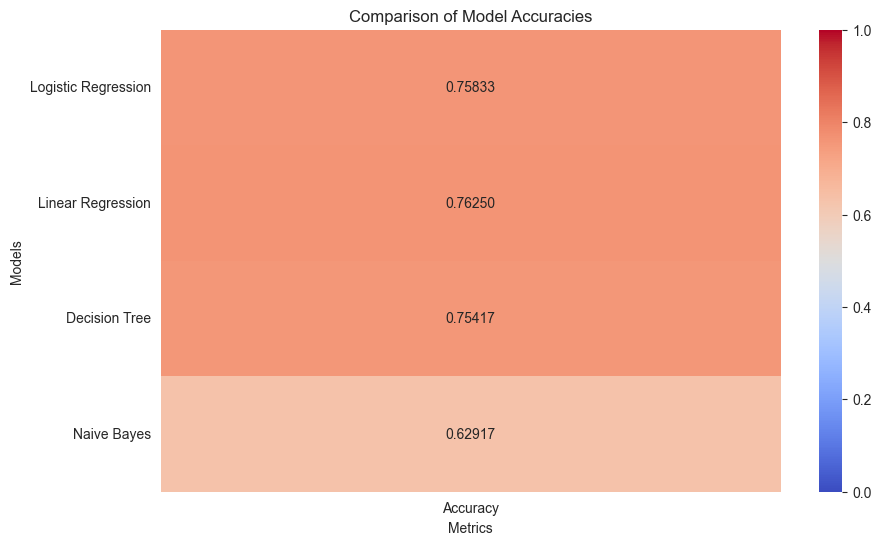

In [24]:
# Tổng hợp tất cả độ chính xác
accuracy_data = {
    'Model': [
        'Logistic Regression','Linear Regression', 'Decision Tree', 'Naive Bayes'
    ],
    'Accuracy': [
        accuracy_llr ,accuracy_lr, accuracy_tree,  accuracy_nb
    ]
}

df_accuracy = pd.DataFrame(accuracy_data)

# In ra bảng độ chính xác
print(df_accuracy)

# Vẽ heatmap so sánh độ chính xác
plt.figure(figsize=(10, 6))
sns.heatmap(df_accuracy[['Accuracy']].set_index(df_accuracy['Model']), 
            annot=True, fmt='.5f', cmap='coolwarm', cbar=True, vmin=0, vmax=1)

plt.title('Comparison of Model Accuracies')
plt.xlabel('Metrics')
plt.ylabel('Models')
plt.show()
